<a href="https://colab.research.google.com/github/apoorvapu/data_science/blob/main/Employee_resignation_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
# Load the CSV from GitHub
url = "https://raw.githubusercontent.com/raghav582/Capstone-Project-ML-HR-Analytics/refs/heads/master/HR_comma_sep.csv"
df = pd.read_csv(url)
# Display first few rows
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   Department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


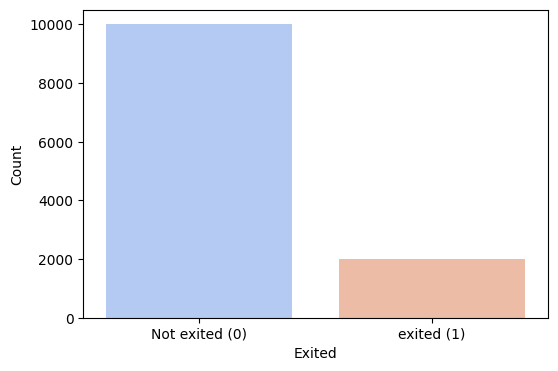

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution
plt.figure(figsize=(6,4))
sns.barplot(x=df["left"].value_counts().index, y=df["left"].value_counts().values, hue=df["left"].value_counts().index, legend=False, palette="coolwarm")

# Add labels
plt.xlabel("Exited")
plt.ylabel("Count")
plt.xticks([0,1], ["Not exited (0)", "exited (1)"])
plt.show()

it is an imbalanced datset - so will use Class Weights in the Model. Many ML models support class weights to penalize misclassification of the minority class.

In [8]:
# Separate categorical and numerical features
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()
numerical_features = df.select_dtypes(include=["int", "float"]).columns.tolist()

# Remove the target variable "Exited" from numerical features
numerical_features.remove("left")

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)


Categorical Features: ['Department', 'salary']
Numerical Features: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']


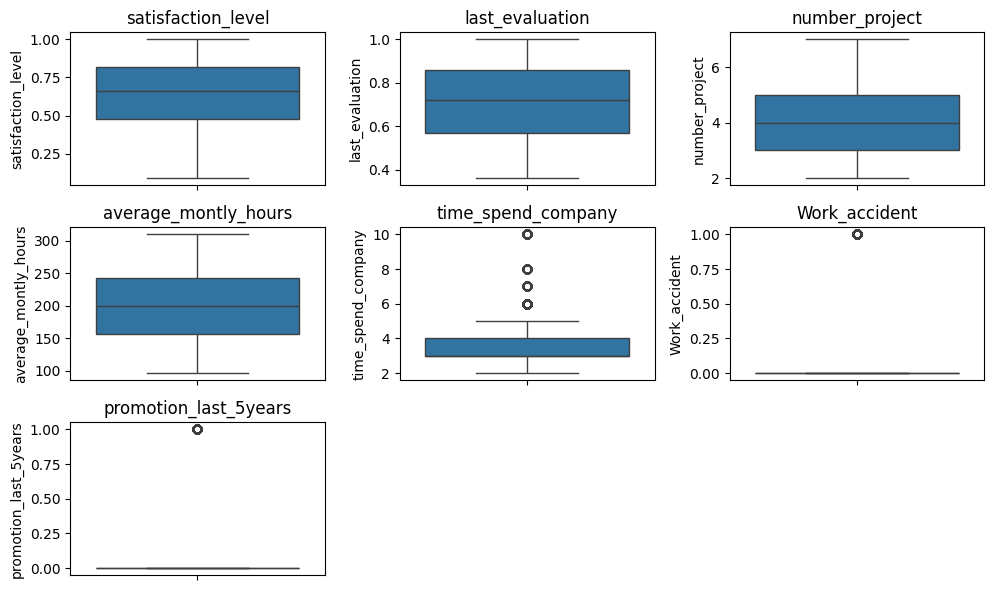

In [9]:
# Plot box plots for each numerical feature
plt.figure(figsize=(10, 6))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)  # Adjust grid size based on number of features
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

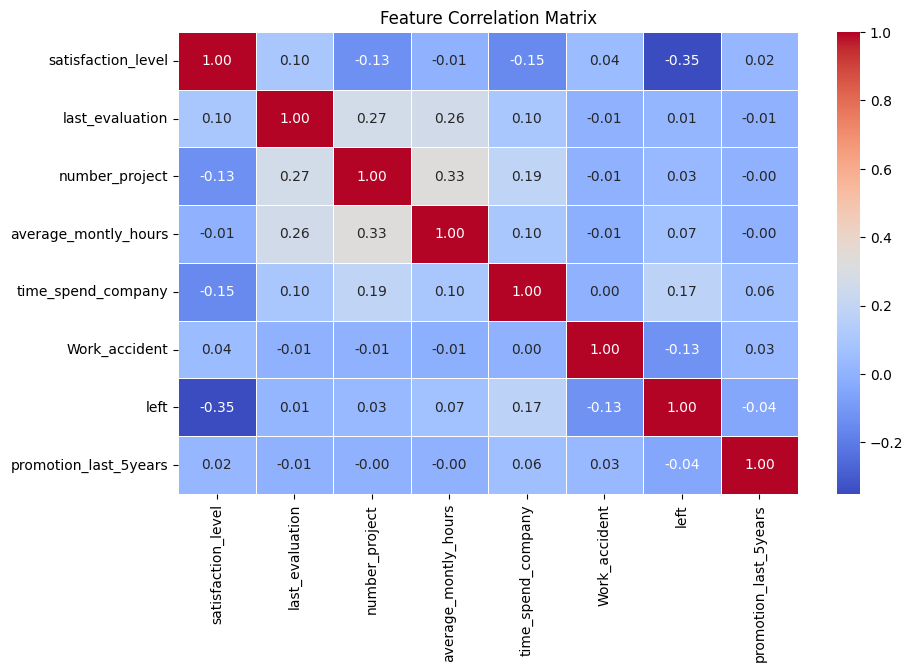

In [10]:
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

not much correlation (+ve or -ve) between features


In [11]:
for col in categorical_features:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].unique())  # Show actual unique values
    print("-" * 40)

Department: 10 unique values
['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
----------------------------------------
salary: 3 unique values
['low' 'medium' 'high']
----------------------------------------


encode Categorical features and scale Numerical Features



In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1,0.0,sales,low
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1,0.0,sales,medium
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1,0.0,sales,medium
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,1,0.0,sales,low
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,1,0.0,sales,low


In [13]:
from sklearn.preprocessing import OneHotEncoder

df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1,0.0,False,False,False,False,False,False,True,False,False,True,False
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1,0.0,False,False,False,False,False,False,True,False,False,False,True
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1,0.0,False,False,False,False,False,False,True,False,False,False,True
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,1,0.0,False,False,False,False,False,False,True,False,False,True,False
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,1,0.0,False,False,False,False,False,False,True,False,False,True,False


In [14]:
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = df.drop(columns=["left"])
y = df["left"]

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (9592, 18), Test shape: (2399, 18)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve

# Initialize the Logistic Regression model with regularization (C is the inverse of regularization strength)
model = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)

# Perform Cross-validation (5-fold)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

# Print Cross-validation results
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean():.4f}")

Cross-validation scores: [0.81771748 0.82324647 0.81522602 0.82409984 0.81671734]
Average cross-validation score: 0.8194


In [16]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for `C` (regularization strength)
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}  # Search for values of `C`
grid_search = GridSearchCV(LogisticRegression(solver='liblinear', random_state=42, max_iter=1000),
                           param_grid, cv=5, scoring='roc_auc')

grid_search.fit(X_train, y_train)

# Print best hyperparameter and score
print(f"Best hyperparameter (C): {grid_search.best_params_['C']}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

Best hyperparameter (C): 100
Best cross-validation score: 0.8202


Test AUC score: 0.8417


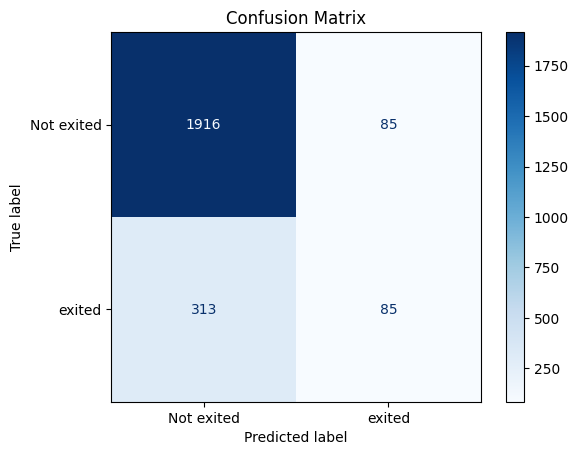

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
best_model = grid_search.best_estimator_
# Predict probabilities on the test set
y_probs = best_model.predict_proba(X_test)[:, 1]  # Get probability for the positive class (1)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_probs)
print(f"Test AUC score: {auc_score:.4f}")

# Predict class labels on the test set
y_pred = best_model.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Not exited', 'exited'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


model = Sequential([
        Dense(64, activation='relu', input_shape=(len(X_train.columns),)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

model.compile(optimizer=Adam(learning_rate=0.005),
                  loss='binary_crossentropy',
                  metrics=[tf.keras.metrics.AUC(name="auc")])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

history = model.fit(X_train, y_train, epochs=100,
                        validation_data=(X_val, y_val), verbose=1)

Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - auc: 0.6710 - loss: 0.4324 - val_auc: 0.9301 - val_loss: 0.2618
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - auc: 0.9135 - loss: 0.2593 - val_auc: 0.9600 - val_loss: 0.1919
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - auc: 0.9436 - loss: 0.2074 - val_auc: 0.9682 - val_loss: 0.1885
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - auc: 0.9574 - loss: 0.1756 - val_auc: 0.9743 - val_loss: 0.1407
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - auc: 0.9615 - loss: 0.1661 - val_auc: 0.9748 - val_loss: 0.1347
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - auc: 0.9604 - loss: 0.1682 - val_auc: 0.9734 - val_loss: 0.1435
Epoch 7/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - auc: 0.9605 - loss: 0.1649 - val_auc: 0.9759 - val_loss: 0.1215
Epoch 8/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - auc: 0.9660 - loss: 0.1446 - val_auc: 0.9749 - val_loss: 0.1316
Epoch 9/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

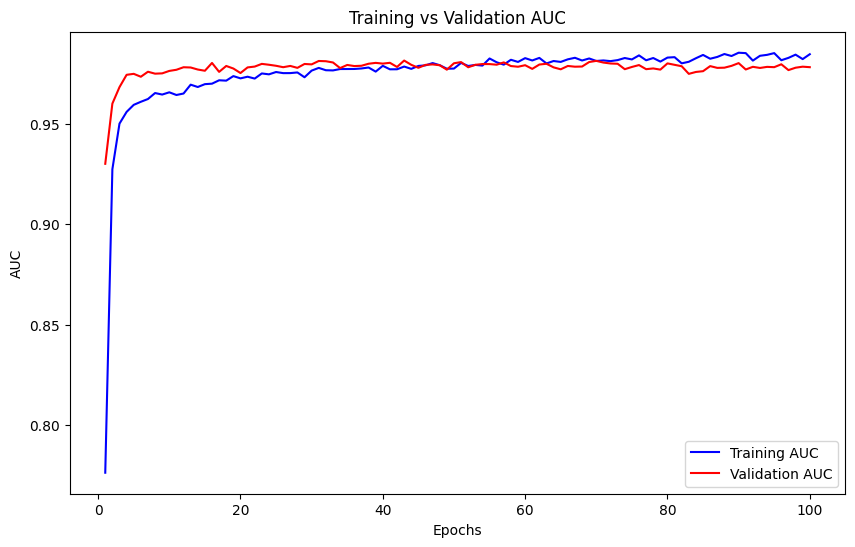

In [20]:
plt.figure(figsize=(10, 6))
epochs_range = range(1, len(history.history['auc']) + 1)
plt.plot(epochs_range, history.history['auc'], label="Training AUC", color='blue')
plt.plot(epochs_range, history.history['val_auc'], label="Validation AUC", color='red')
plt.xlabel("Epochs")
plt.ylabel("AUC")
plt.title("Training vs Validation AUC")
plt.legend()
plt.show()

In [21]:
y_probs_rf = model.predict(X_test)

# Compute the AUC score for Random Forest
auc = roc_auc_score(y_test, y_probs_rf)
print(f"AUC: {auc:.4f}")


75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
AUC: 0.9801
